Goals: 
- Scrape data table about Population & Density of Vietnam from wikipedia page: 
https://vi.wikipedia.org/wiki/T%E1%BB%89nh_th%C3%A0nh_Vi%E1%BB%87t_Nam
- Use this data to analyze Population & Density by Provinces and Regions in Vietnam

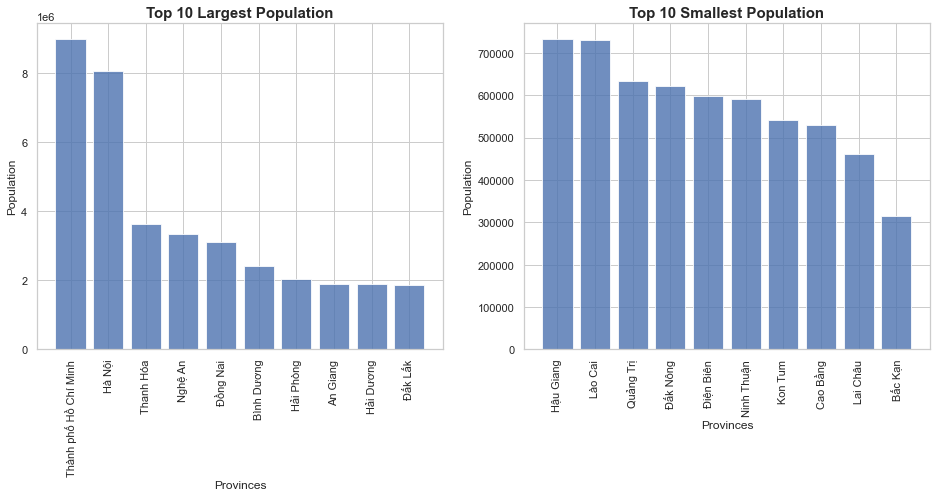

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=[16, 6])

data = pd.read_html('https://vi.wikipedia.org/wiki/T%E1%BB%89nh_th%C3%A0nh_Vi%E1%BB%87t_Nam', 
                    thousands='.', decimal=',')
raw_data = data[2]
clean_data = raw_data.copy()
clean_data = raw_data.iloc[:, 1:7]
clean_data.columns = ['Province', 'Province[2]', 'Region', 
                      'Population', 'Area', 'Density']

# The below code will create two plots
plt.subplot(1,2,1)

# 10 Provinces with the largest Population Density in 2020
large_10_pop = clean_data.nlargest(10, 'Population')
large_10_pop = large_10_pop.sort_values('Population', ascending=False)
y_pos = np.arange(len(large_10_pop))
plt.bar(y_pos, large_10_pop.Population, align='center', alpha=0.8, width=0.8)
plt.xlabel("Provinces")
plt.ylabel("Population")
plt.title("Top 10 Largest Population", fontsize=15, fontweight='bold')
plt.xticks(y_pos, large_10_pop.Province, rotation=90)

#The below code will create the second plot.
plt.subplot(1,2,2)

# 10 Provinces with the largest Population in 2020
small_10_pop= clean_data.nsmallest(10, 'Population')
small_10_pop = small_10_pop.sort_values('Population', ascending=False)

# create chart
y_pos = np.arange(len(small_10_pop))
plt.bar(y_pos, small_10_pop.Population, align='center', alpha=0.8, width=0.8)
plt.xlabel("Provinces")
plt.ylabel("Population")
plt.title("Top 10 Smallest Population", fontsize=15, fontweight='bold')
plt.xticks(y_pos, small_10_pop.Province, rotation=90)
plt.show()


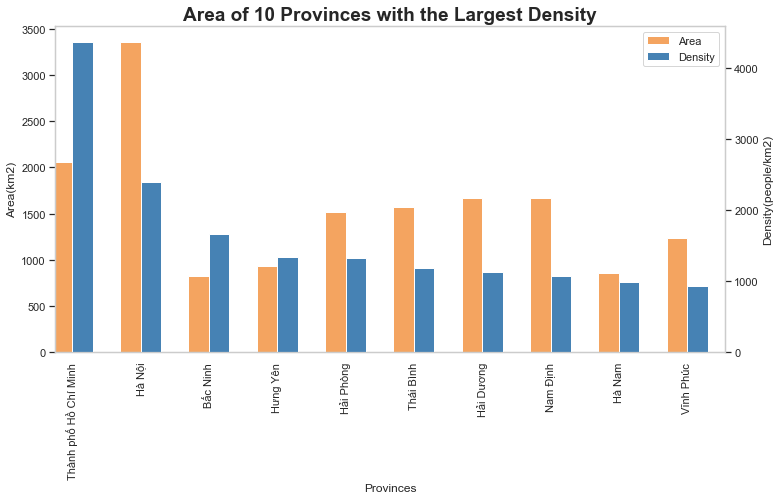

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

data = pd.read_html('https://vi.wikipedia.org/wiki/T%E1%BB%89nh_th%C3%A0nh_Vi%E1%BB%87t_Nam', 
                    thousands='.', decimal=',')
raw_data = data[2]
clean_data = raw_data.copy()
clean_data = raw_data.iloc[:,1:7]
clean_data.columns = ['Province', 'Province[2]', 'Region', 
                      'Population', 'Area', 'Density']

# top 10 largest Area in 2020
top_10_dens = clean_data.nlargest(10, 'Density')
top_10_dens = top_10_dens.sort_values('Density', ascending=False)

# create chart
x = np.arange(len(top_10_dens))
fig = plt.figure(figsize=[12, 6])  # Create matplotlib figure
ax = fig.add_subplot(111)  # Create matplotlib axes
ax2 = ax.twinx()  # Create another axes that shares the same x-axis as ax.

width = 0.3

top_10_dens.Area.plot(kind='bar', color='sandybrown',
                       ax=ax, legend=False, width=width, position=1)
top_10_dens.Density.plot(kind='bar', color='steelblue',
                 ax=ax2, legend=False, width=width, position=0)
ax.set_xlabel("Provinces")
ax.set_ylabel('Area(km2)')
ax2.set_ylabel('Density(people/km2)')
ax.grid(False)
ax2.grid(False)
ax.figure.legend(['Area', 'Density'], bbox_to_anchor=(1., 1),
                 loc=1, bbox_transform=ax.transAxes)
ax.set_title("Area of 10 Provinces with the Largest Density",
          fontsize=19, fontweight='bold')
ax.set_xticklabels(top_10_dens.Province, rotation=90)
plt.show()


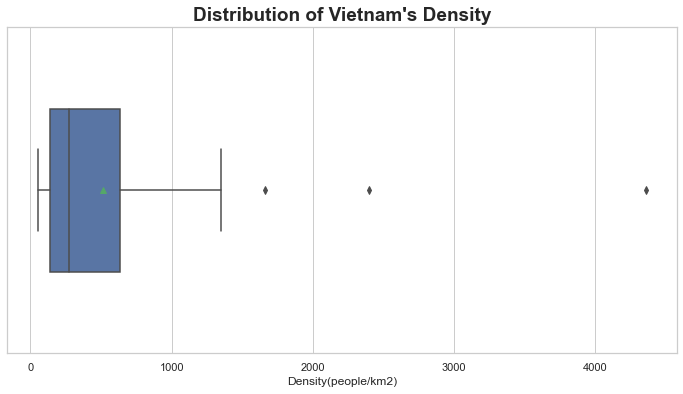

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=[12, 6])

data = pd.read_html('https://vi.wikipedia.org/wiki/T%E1%BB%89nh_th%C3%A0nh_Vi%E1%BB%87t_Nam', 
                    thousands='.', decimal=',')
raw_data = data[2]
clean_data = raw_data.copy()
clean_data = raw_data.iloc[:,1:7]
clean_data.columns = ['Province', 'Province[2]', 'Region', 
                      'Population', 'Area', 'Density']

# create chart
ax = sns.boxplot(x='Density', data=clean_data,showmeans=True, width = 0.5)
ax.set_xlabel("Density(people/km2)")
ax.set_title("Distribution of Vietnam's Density", fontsize=19, fontweight='bold')
plt.show()


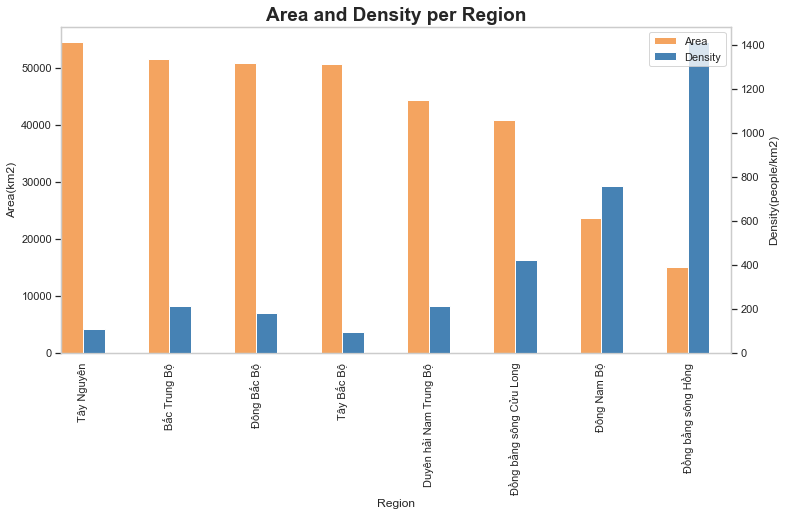

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

data = pd.read_html('https://vi.wikipedia.org/wiki/T%E1%BB%89nh_th%C3%A0nh_Vi%E1%BB%87t_Nam', 
                    thousands='.', decimal=',')
raw_data = data[2]
clean_data = raw_data.copy()
clean_data = raw_data.iloc[:,1:7]
clean_data.columns = ['Province', 'Province[2]', 'Region', 
                      'Population', 'Area', 'Density']

# Group by Region
region_data = clean_data.iloc[:,2:5]
region_data = region_data.groupby(by=["Region"]).sum()
region_data['Density'] = region_data['Population'] / region_data['Area']
region_data['Density'] = region_data['Density'].astype(int) 
region_data = region_data.sort_values('Area', ascending=False)

# create chart
fig = plt.figure(figsize=[12, 6])  # Create matplotlib figure
ax = fig.add_subplot(111)  # Create matplotlib axes
ax2 = ax.twinx()  # Create another axes that shares the same x-axis as ax.

width = 0.5
region_data.Area.plot(kind='bar', color='sandybrown',
                            ax=ax, legend=False, width=width / 2, position=1)
region_data.Density.plot(kind='bar', color='steelblue',
                      ax=ax2, legend=False, width=width / 2, position=0)

ax.set_ylabel('Area(km2)')
ax2.set_ylabel('Density(people/km2)')
ax.grid(False)
ax2.grid(False)
ax.figure.legend(['Area', 'Density'], bbox_to_anchor=(1., 1),
                 loc=1, bbox_transform=ax.transAxes)
plt.title("Area and Density per Region", fontsize=19, fontweight='bold')
plt.show()


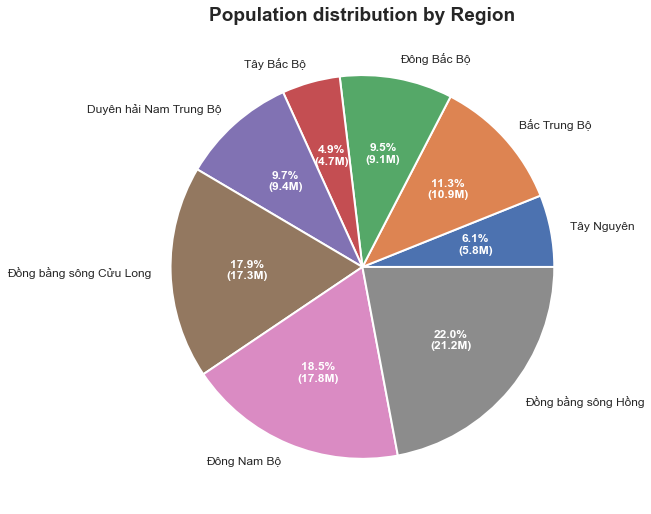

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

data = pd.read_html('https://vi.wikipedia.org/wiki/T%E1%BB%89nh_th%C3%A0nh_Vi%E1%BB%87t_Nam', 
                    thousands='.', decimal=',')
raw_data = data[2]
clean_data = raw_data.copy()
clean_data = raw_data.iloc[:,1:7]
clean_data.columns = ['Province', 'Province[2]', 'Region', 
                      'Population', 'Area', 'Density']

# create chart
fig, ax = plt.subplots(figsize=(9, 9))
# creating autocpt arguments
def func(pct, allvalues):
    people = float(pct / 100.*np.sum(allvalues) / 1000000)
    return "{:.1f}%\n({:.1f}M)".format(pct, people)
# capture each of the return elements.
patches, texts, pcts = ax.pie(
    region_data['Population'], labels = region_data.index, 
    autopct = lambda pct: func(pct, region_data['Population']),
    wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
    textprops={'size': 12})
# style just the percent values.
ax.set_title("Population distribution by Region", 
             fontsize=19, fontweight='bold')
plt.setp(pcts, color='white', fontsize=12, fontweight='bold')
plt.tight_layout()


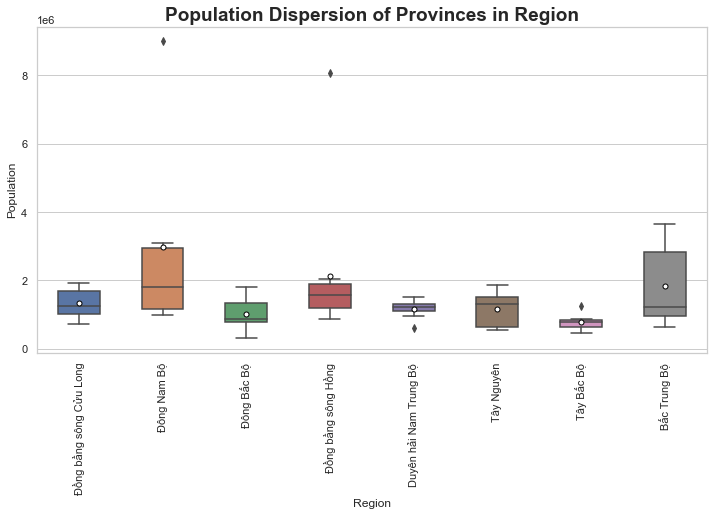

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

data = pd.read_html('https://vi.wikipedia.org/wiki/T%E1%BB%89nh_th%C3%A0nh_Vi%E1%BB%87t_Nam', 
                    thousands='.', decimal=',')
raw_data = data[2]
clean_data = raw_data.copy()
clean_data = raw_data.iloc[:,1:7]
clean_data.columns = ['Province', 'Province[2]', 'Region', 
                      'Population', 'Area', 'Density']

# create chart
plt.figure(figsize=[12,6])
ax = sns.boxplot(x='Region', y='Population', showmeans=True, data=clean_data,
            meanprops={"marker":"o",
                      "markerfacecolor":"white", 
                      "markeredgecolor":"black",
                      "markersize":"5"}, width = 0.5
            )
ax.set_title("Population Dispersion of Provinces in Region", 
             fontsize=19, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()


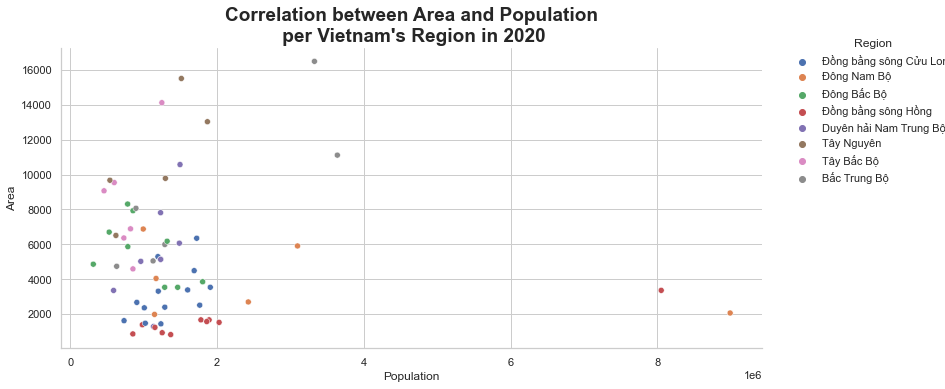

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

data = pd.read_html('https://vi.wikipedia.org/wiki/T%E1%BB%89nh_th%C3%A0nh_Vi%E1%BB%87t_Nam', 
                    thousands='.', decimal=',')
raw_data = data[2]
clean_data = raw_data.copy()
clean_data = raw_data.iloc[:,1:7]
clean_data.columns = ['Province', 'Province[2]', 'Region', 'Population', 'Area', 'Density']

#create chart
ax = sns.relplot(y="Area",x="Population",hue="Region",data=clean_data, height=5, aspect=2.2)
leg = ax._legend
leg.set_bbox_to_anchor([1, 1])  # coordinates of lower left of bounding box
leg._loc = 1  # set the loc
plt.title("Correlation between Area and Population\n per Vietnam's Region in 2020", 
          fontsize=19, fontweight='bold')
plt.show()
